In [69]:
import numpy as np
import pandas as pd
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
#download the data set and unzip the folder

In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url,untar=True)


228813984/228813984 [==============================] - 116s 1us/step


In [10]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos')

In [11]:
list(data_dir.glob('roses/*'))   # golb ka kam ha ki folder ma jaka sara value ko return kardaga

[WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/data

In [19]:
flower_dict={
    'daisy':list(data_dir.glob('daisy/*'))  ,
    'dandelion':list(data_dir.glob('dandelion/*'))  ,
    'roses':list(data_dir.glob('roses/*')) ,
    'sunflowers':list(data_dir.glob('sunflowers/*'))  ,
    'tulips':list(data_dir.glob('tulips/*'))
}

In [20]:
flower_dict['roses']

[WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/ishuk/.keras/data

In [21]:
flower_level={
    "daisy":0,
    "dandelion":1,
    'roses':2 ,
  
    "sunflowers":3,
    "tulips":4,
}

In [22]:
x,y=[],[]

for key , valu in flower_dict.items():
    for item in valu:
        img=cv2.imread(str(item))
        reduced_image=cv2.resize(img,(224,224))
        x.append(reduced_image)
        y.append(flower_level[key])

In [24]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [23]:
len(x),  len(y)

(3670, 3670)

In [25]:
x[0]

array([[[134, 135, 135],
        [139, 140, 140],
        [145, 145, 145],
        ...,
        [152, 154, 154],
        [154, 154, 154],
        [150, 150, 150]],

       [[132, 134, 134],
        [137, 139, 139],
        [144, 144, 144],
        ...,
        [152, 154, 154],
        [154, 154, 154],
        [149, 149, 149]],

       [[131, 133, 133],
        [137, 139, 139],
        [143, 144, 144],
        ...,
        [151, 153, 153],
        [153, 153, 153],
        [147, 147, 147]],

       ...,

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [124, 125, 129]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [126, 127, 131],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [127, 128, 132],
        [127, 128, 132]]

In [26]:
x[0].shape

(224, 224, 3)

In [27]:
# we are conver in the image value to numpy array , becouse numpy array have fast processing
x=np.array(x)
y=np.array(y)


In [28]:
x_train, x_test , y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [29]:
x_train

array([[[[159, 154, 156],
         [160, 153, 160],
         [185, 179, 185],
         ...,
         [ 75,  84,  64],
         [116, 115,  97],
         [126, 117, 106]],

        [[153, 148, 149],
         [155, 148, 155],
         [178, 171, 178],
         ...,
         [ 76,  61,  57],
         [131, 112, 109],
         [123,  99, 100]],

        [[149, 143, 145],
         [150, 143, 149],
         [166, 159, 166],
         ...,
         [ 84,  75,  65],
         [126, 118, 110],
         [121, 113, 103]],

        ...,

        [[ 96,  98, 108],
         [ 96,  98, 106],
         [103, 102, 107],
         ...,
         [ 96,  96,  99],
         [ 29,  31,  33],
         [ 23,  29,  25]],

        [[ 93,  96, 104],
         [ 96,  98, 103],
         [108, 109, 113],
         ...,
         [ 60,  58,  58],
         [ 29,  29,  28],
         [ 28,  32,  27]],

        [[ 92,  96,  97],
         [100, 102, 102],
         [121, 123, 124],
         ...,
         [ 33,  25,  35],
        

In [30]:
x_train.shape

(2936, 224, 224, 3)

In [31]:
x_train[0]

array([[[159, 154, 156],
        [160, 153, 160],
        [185, 179, 185],
        ...,
        [ 75,  84,  64],
        [116, 115,  97],
        [126, 117, 106]],

       [[153, 148, 149],
        [155, 148, 155],
        [178, 171, 178],
        ...,
        [ 76,  61,  57],
        [131, 112, 109],
        [123,  99, 100]],

       [[149, 143, 145],
        [150, 143, 149],
        [166, 159, 166],
        ...,
        [ 84,  75,  65],
        [126, 118, 110],
        [121, 113, 103]],

       ...,

       [[ 96,  98, 108],
        [ 96,  98, 106],
        [103, 102, 107],
        ...,
        [ 96,  96,  99],
        [ 29,  31,  33],
        [ 23,  29,  25]],

       [[ 93,  96, 104],
        [ 96,  98, 103],
        [108, 109, 113],
        ...,
        [ 60,  58,  58],
        [ 29,  29,  28],
        [ 28,  32,  27]],

       [[ 92,  96,  97],
        [100, 102, 102],
        [121, 123, 124],
        ...,
        [ 33,  25,  35],
        [ 33,  28,  38],
        [ 26,  24,  30]]

In [32]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
# x ma image ha  or y ma label ha

In [33]:
x_test_scaled[0]

array([[[0.72941176, 0.58823529, 0.55686275],
        [0.79215686, 0.65490196, 0.62745098],
        [0.77254902, 0.65882353, 0.62745098],
        ...,
        [0.78039216, 0.68627451, 0.65490196],
        [0.72156863, 0.63137255, 0.58823529],
        [0.72941176, 0.62745098, 0.58431373]],

       [[0.84705882, 0.70588235, 0.64705882],
        [0.89019608, 0.75686275, 0.69803922],
        [0.85490196, 0.7254902 , 0.66666667],
        ...,
        [0.91764706, 0.82745098, 0.85098039],
        [0.71764706, 0.55294118, 0.52156863],
        [0.71372549, 0.54901961, 0.51372549]],

       [[0.83137255, 0.70196078, 0.64313725],
        [0.8       , 0.6745098 , 0.60784314],
        [0.83921569, 0.71372549, 0.64313725],
        ...,
        [0.99215686, 0.95294118, 0.97254902],
        [0.94509804, 0.90588235, 0.89019608],
        [0.97254902, 0.93333333, 0.91372549]],

       ...,

       [[0.15686275, 0.29019608, 0.23921569],
        [0.15686275, 0.42352941, 0.37647059],
        [0.38823529, 0

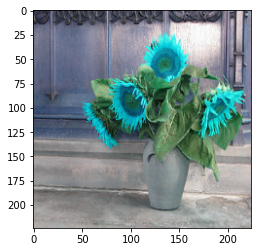

In [38]:
plt.imshow(x_test_scaled[10])
#plt.xlabel([key for key , value in flower_level.items() if value ==y_train[10][0]])    # finding thn name
plt.show()

In [39]:
no_of_classes=len(flower_level.keys())

In [58]:
model=Sequential(
    [ 
     # Convolution Layer
     layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),  #Conv = ccn layer  #32 filter ha image pa laga ga   #(3,3) kernal ha 
     #64 image 64 output dagi or maxpooling ma max value lagi
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),


     #flattening layer
     layers.Flatten(),  # 3D to 1D converted

     #Dense layers for classification   # ann layer
     layers.Dense(62,activation='relu'),  #hidden layer
     layers.Dense(no_of_classes,activation='softmax'),   #output class

    
        
    ]
)


#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#multipel categery/classes ha usko hum na integer form ma keya ha
              metrics=['accuracy'])



In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

In [42]:
model.fit(x_train_scaled,y_train,epochs=1)

92/92 [==============================] - 139s 1s/step - loss: 1.5195 - accuracy: 0.3672


In [43]:
#model.fit(x_train_scaled,y_train,epochs=5,batch_size=40)

Epoch 1/10
92/92 [==============================] - 129s 1s/step - loss: 1.1113 - accuracy: 0.5402
Epoch 2/10
92/92 [==============================] - 129s 1s/step - loss: 0.9361 - accuracy: 0.6308
Epoch 3/10
92/92 [==============================] - 145s 2s/step - loss: 0.7386 - accuracy: 0.7166
Epoch 4/10
81/92 [=========================>....] - ETA: 15s - loss: 0.5112 - accuracy: 0.8106

KeyboardInterrupt: 

In [ ]:
# # predict

# y_pred = model.predict(sc.transform([[7.9,	0.320,	0.51,	1.8,	0.341,	17.0,	56.0,	0.9969,	3.04,	1.08,	9.2]]))



In [44]:
prediction=model.predict(x_test)

23/23 [==============================] - 10s 447ms/step


In [45]:
prediction.shape

(734, 5)

In [46]:
prediction[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [60]:
ls_of_label=list(flower_level.keys())
ls_of_label

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [61]:
prediction_class=np.argmax(prediction,axis=1)

In [66]:
def make_prdition_list(prediction_class,y_test):
    actual=[]
    pred=[]
    # to get prediction
    for preds in prediction_class:
        pred.append(ls_of_label[preds])

    #to get actual label
    for act in y_test:
        actual.append(ls_of_label[act])

    pretty_df=pd.DataFrame({'actual_flower':actual,'predict_flower':pred})
    return pretty_df


In [67]:
df=make_prdition_list(prediction_class,y_test)
df.head(30)


actual_flower predict_flower
0     sunflowers     sunflowers
1          daisy     sunflowers
2          daisy          daisy
3         tulips         tulips
4     sunflowers     sunflowers
5      dandelion         tulips
6          daisy          roses
7          roses          daisy
8      dandelion     sunflowers
9         tulips         tulips
10    sunflowers     sunflowers
11    sunflowers     sunflowers
12         roses         tulips
13        tulips          daisy
14        tulips      dandelion
15    sunflowers     sunflowers
16     dandelion         tulips
17        tulips         tulips
18        tulips         tulips
19         daisy          roses
20         roses         tulips
21    sunflowers         tulips
22     dandelion      dandelion
23     dandelion      dandelion
24     dandelion      dandelion
25         daisy         tulips
26    sunflowers      dandelion
27        tulips          roses
28        tulips      dandelion
29         daisy          daisy

In [ ]:
#saving the model

In [48]:
model.save('image_classification.h5')

c:\Users\ishuk\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
#lode the model
from tensorflow.keras.model import load_model

model=load_model('image_classification.h5')

ModuleNotFoundError: No module named 'tensorflow.keras.model'

In [ ]:
model.predict(#yaha pa predict ka leya daal da)